#  ggplot2
The ggplot2 is one of the most powerful packages for plotting chars.
Although very powerful, the learning curve for ggplot2 is high, as it is established on a grammar of graphics (https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448) approach.

## mygraphic.R

The $myGraphics.R$ enables plotting charts encapsulating ggplot2.
It enables an easy startup while learning how to use ggplot2. 

The majority of functions require a $data.frame$ with two attributes or more attributes. In most cases, the first attribute is associated with the x-axis. In contrast, the second is related to the y-axis.


## Library
The library $myGraphics.R$ is loaded using the source function. 

In [1]:
# version 1.2
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myBasic.R")
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")

# The easiest way to get ggplot2 is to install the whole tidyverse:
# install.packages("tidyverse")
# Alternatively, install just ggplot2:
# install.packages("ggplot2")
#Use suppressPackageStartupMessages(source(filename)) to avoid warning messages


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'reshape'


The following object is masked from 'package:dplyr':

    rename




## Color palette

One thing very relevant while plotting charts is to preserve visual identity. 
For that, the color brewer is an excellent tool to set up colors for your graphics using appropriate colors.
More information: https://colorbrewer2.org

Take some time to look at how to use it in R: https://rdrr.io/cran/RColorBrewer/man/ColorBrewer.html.

In [2]:
col_set <- brewer.pal(11, 'Spectral')
colors <- col_set[c(11,10,9,8)]

In [3]:
# This function is used only to set graphics size in this notebook. Ignore it for the moment.
plot.size(10, 5)

# setting the font size for all charts
font <- theme(text = element_text(size=16))

### Dataset #1
#### Motor Trend Car Road Tests
The data was extracted from the 1974 Motor Trend US magazine and comprises fuel consumption and ten aspects of automobile design and performance for 32 automobiles (1973–74 models).
It is contained in the datasets package.

In [4]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [5]:
?mtcars

## Example #1

Example #1 is a query on $mtcars$ that is used for scatter and line plots

In [6]:
# example1: dataset to be plotted   
example1 <- mtcars %>% select(wt, mpg, disp)
head(example1)

,wt,mpg,disp
,<dbl>,<dbl>,<dbl>
Mazda RX4,2.620,21.0,160
Mazda RX4 Wag,2.875,21.0,160
Datsun 710,2.320,22.8,108
Hornet 4 Drive,3.215,21.4,258
Hornet Sportabout,3.440,18.7,360
Valiant,3.460,18.1,225


## Scatter plot

A Scatter plot is used to display values for the typical relationship between independent and dependent variables. The first column of the dataset is the independent variable, whereas the following variables are the dependent ones. 

The colors vectors should have the same size as the number of dependent columns. 

More information: https://en.wikipedia.org/wiki/Scatter_plot

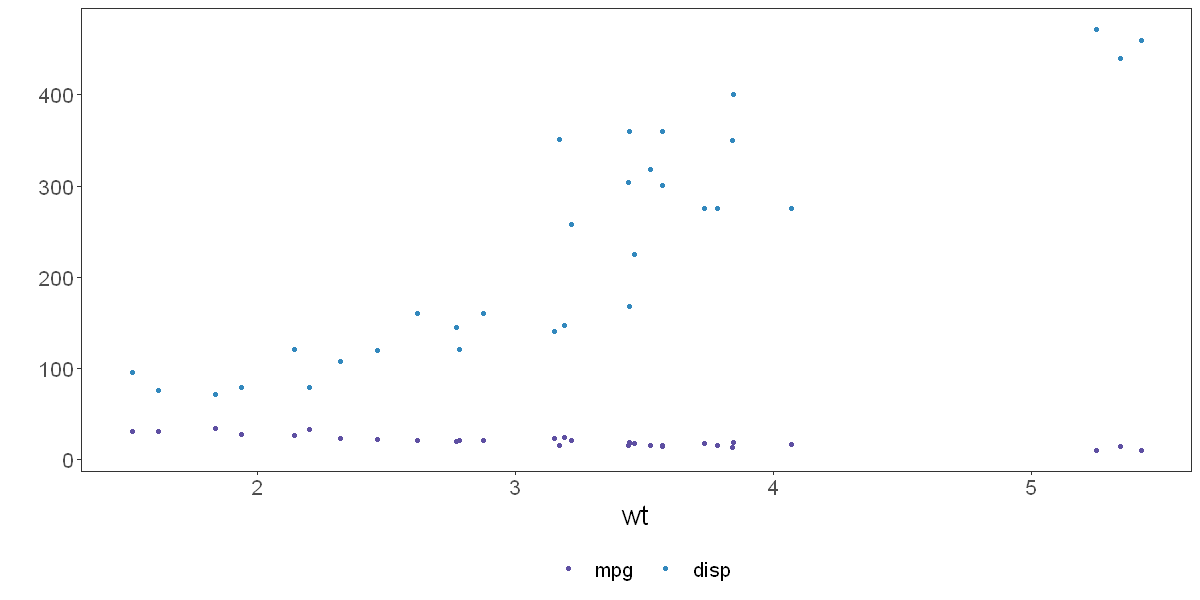

In [7]:
# The function returns a preset graphic that can be enhanced. 
grf <- plot.scatter(example1, label_x = "wt", colors=colors[1:2])
# Increasing the font size of the graphics
grf <- grf + font
# Actual plot
plot(grf)

## Line plot

A line plot is a type of chart that displays information as a series of data points connected by straight line segments. 

It is similar to a scatter plot except that their x-axis value orders the measurement points.

More information: https://en.wikipedia.org/wiki/Line_chart

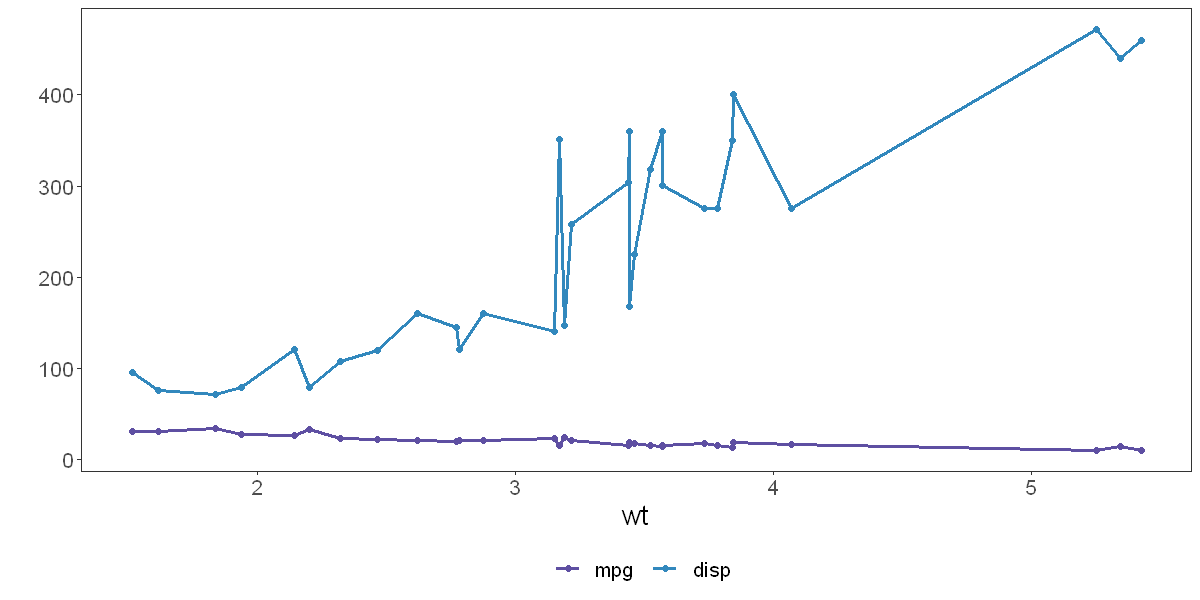

In [8]:
grf <- plot.series(example1, label_x = "wt", colors=colors[1:2]) + font
plot(grf)

## Line plot with a second y-axis

A line plot with a second y-axis is a particular case of a line plot with two different independent variables. The first one is associated with the first y-axis. In contrast, the second one is associated with the second y-axis. 

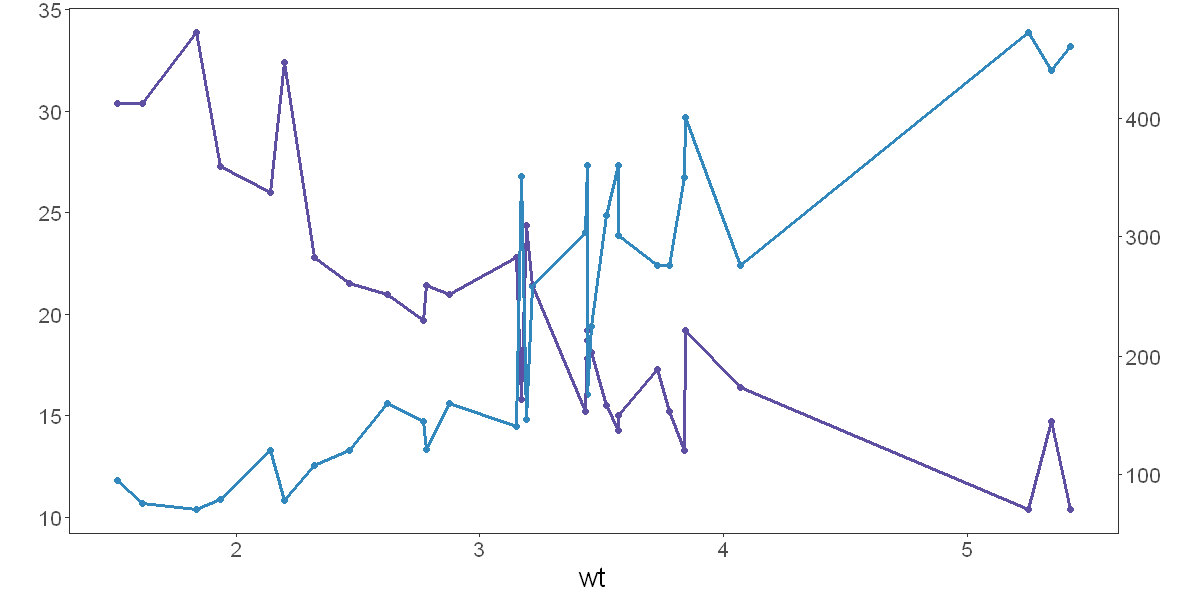

In [9]:
grf <- plot.series2nd(example1, label_x = "wt", colors=colors[1:2]) + font
plot(grf)

## Example #2

Example #2 is a query on $mtcars$ that is used for bar graphs, vertical bars, lollipop, pie charts, and radar plots

In [10]:
# example2: dataset to be plotted  
example2 <- mtcars %>% group_by(cyl) %>% summarize(hp = mean(hp))
head(example2)

cyl,hp
<dbl>,<dbl>
4,82.63636
6,122.28571
8,209.21429


## Bar graph

A bar graph is used to presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

More information: https://en.wikipedia.org/wiki/Bar_chart

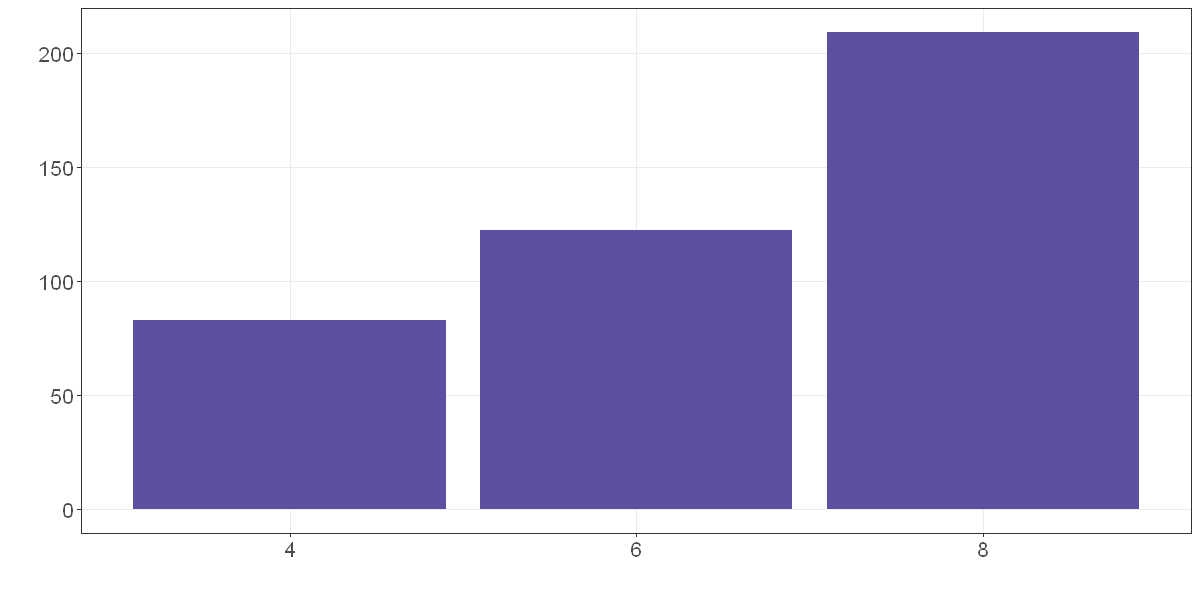

In [11]:
grf <- plot.bar(example2, colors=colors[1]) + font
plot(grf)

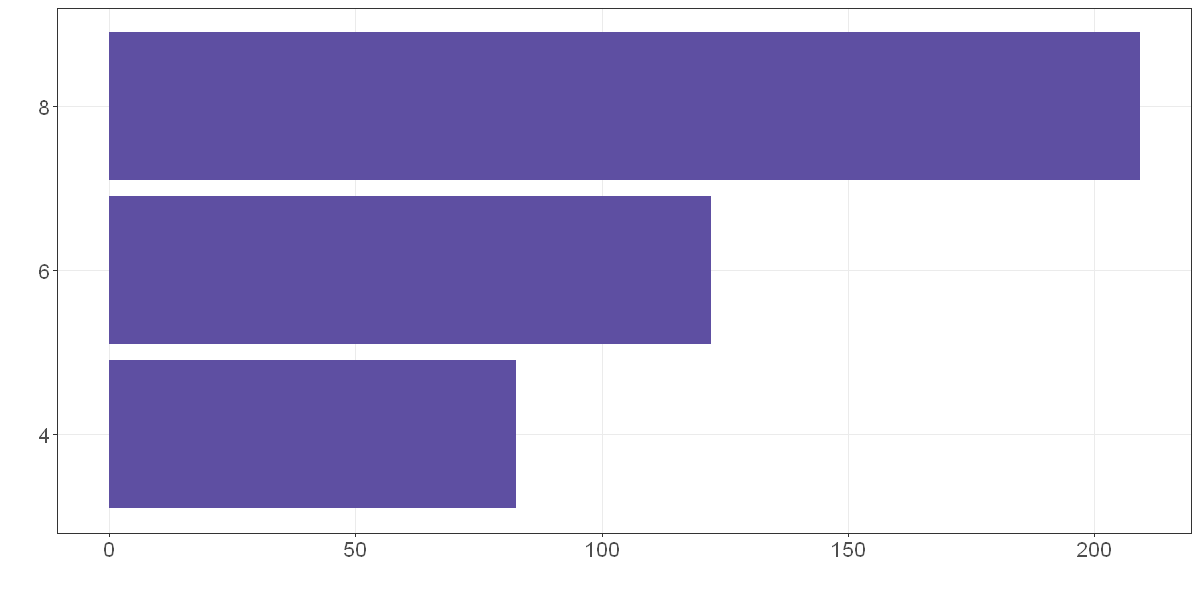

In [12]:
# Sometimes the bars can be plotted vertically. 
#Use function coord_flip() for that.
grf <- grf + coord_flip()
plot(grf)

## Lollipop plot

The lollipop graph has the same goal as a vertical bar graph.

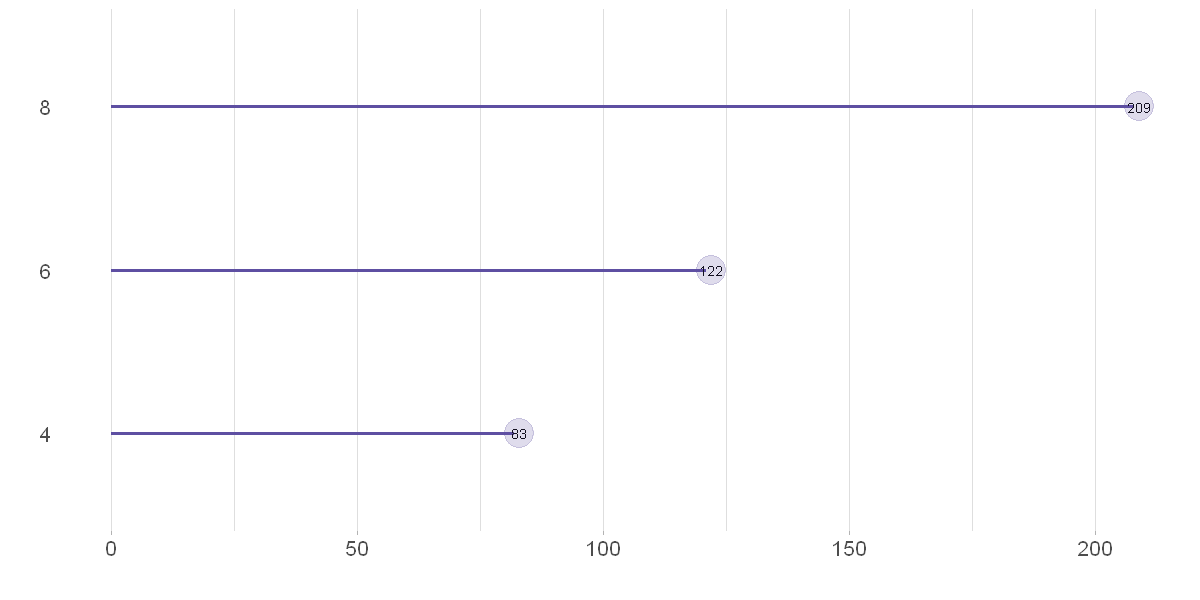

In [13]:
grf <- plot.lollipop(example2, colors=colors[1]) + font
plot(grf)

## Pie chart
A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. 

More information: https://en.wikipedia.org/wiki/Pie_chart

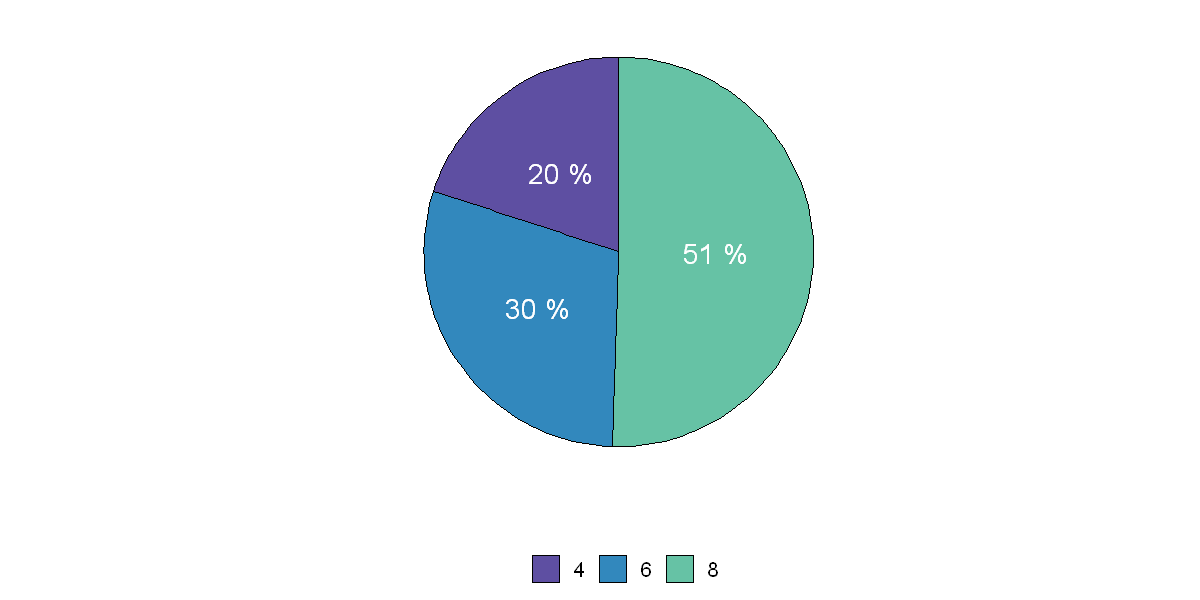

In [14]:
grf <- plot.pieplot(example2, colors=colors[1:nrow(example2)]) + font
plot(grf)

## Radar plot

A radar chart is a graphical method of displaying multivariate data containing three or more quantitative variables represented on axes starting from the same point. 

More information: https://en.wikipedia.org/wiki/Radar_chart

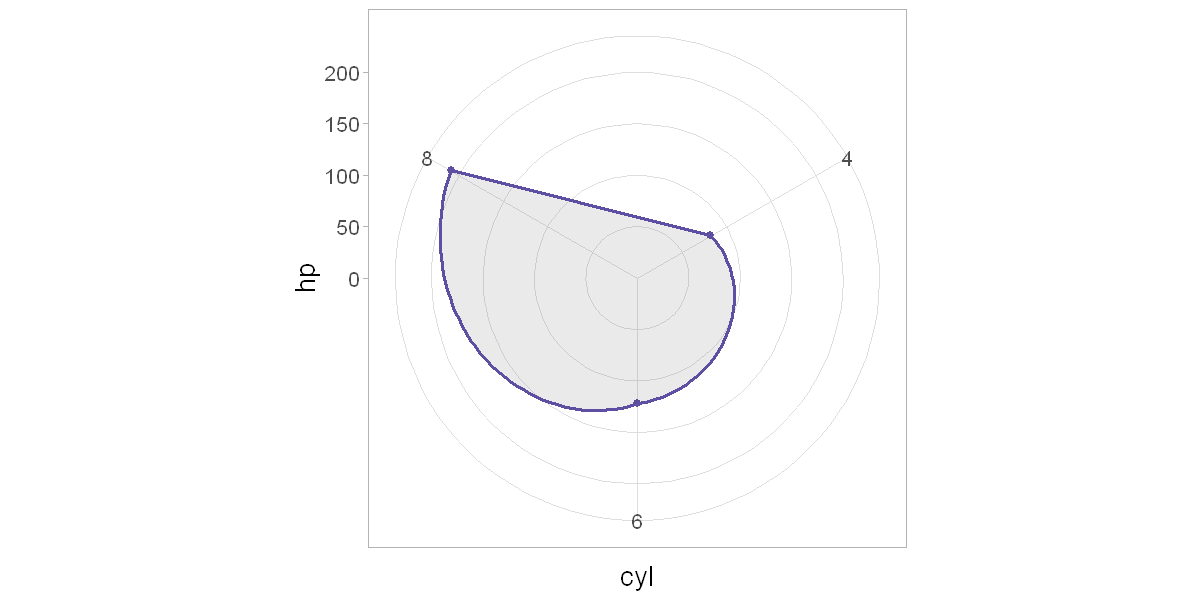

In [15]:
grf <- plot.radar(example2, colors=colors[1]) + font
grf <- grf + ylim(0, NA)
plot(grf)

## Example #3

Example #3 is a query on $mtcars$ that is used for bar graphs with error bars, stacked bars, grouped bars, and dot plots

In [16]:
# example3: dataset to be plotted  
example3 <- mtcars %>% group_by(cyl) %>% summarize(mean = mean(hp), sd=sd(hp))
head(example3)

cyl,mean,sd
<dbl>,<dbl>,<dbl>
4,82.63636,20.93453
6,122.28571,24.26049
8,209.21429,50.97689


## Bar graph with error bars
When bar graphs present an average behavior, it is possible to plot a dispersion around it using an error bar.

The error bar is added using $geom\_errorbar()$ function to a previously defined bar graph. 

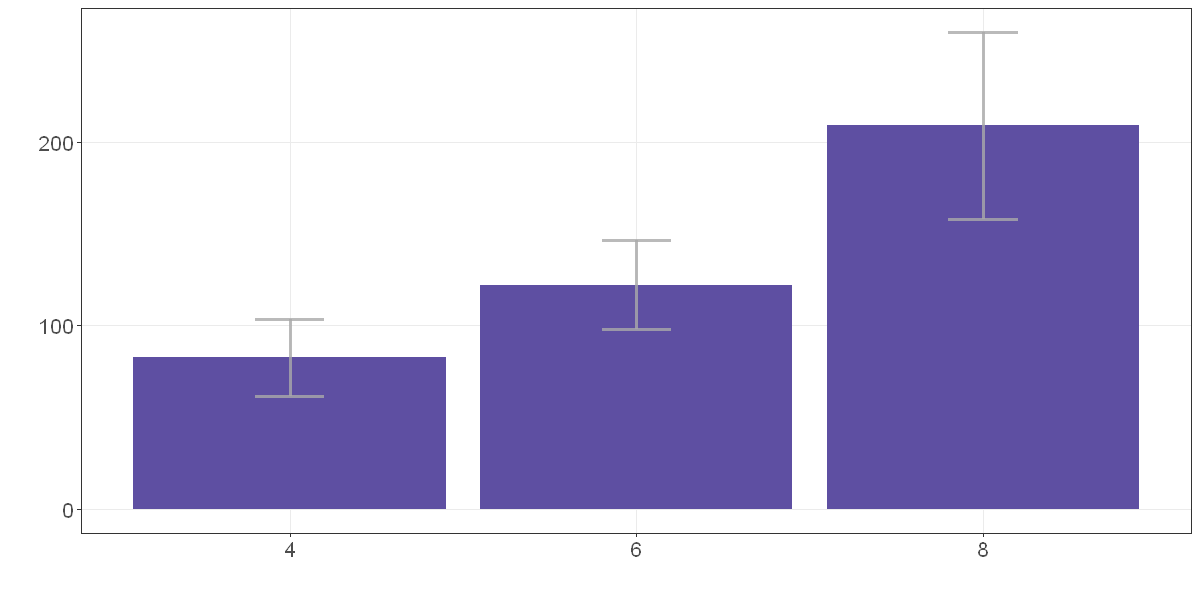

In [17]:
grf <- plot.bar(example3, colors=colors[1], alpha=1) + font
grf <- grf + geom_errorbar(aes(x=cyl, ymin=mean-sd, ymax=mean+sd), 
                           width=0.2, colour="darkgray", alpha=0.8, size=1.1) 
plot(grf)

## Grouped bar & Stacked-bar

Grouped bar charts and stacked bar charts are used to organize data into groups for each category.

In a grouped bar chart, for each categorical group, there are two or more bars. These bars are color-coded to represent a particular grouping. Alternatively, a stacked bar chart stacks bars that represent different groups on top of each other. The height of the resulting bar shows the combined result of the groups. 

More information: https://en.wikipedia.org/wiki/Bar_chart#Grouped_or_stacked

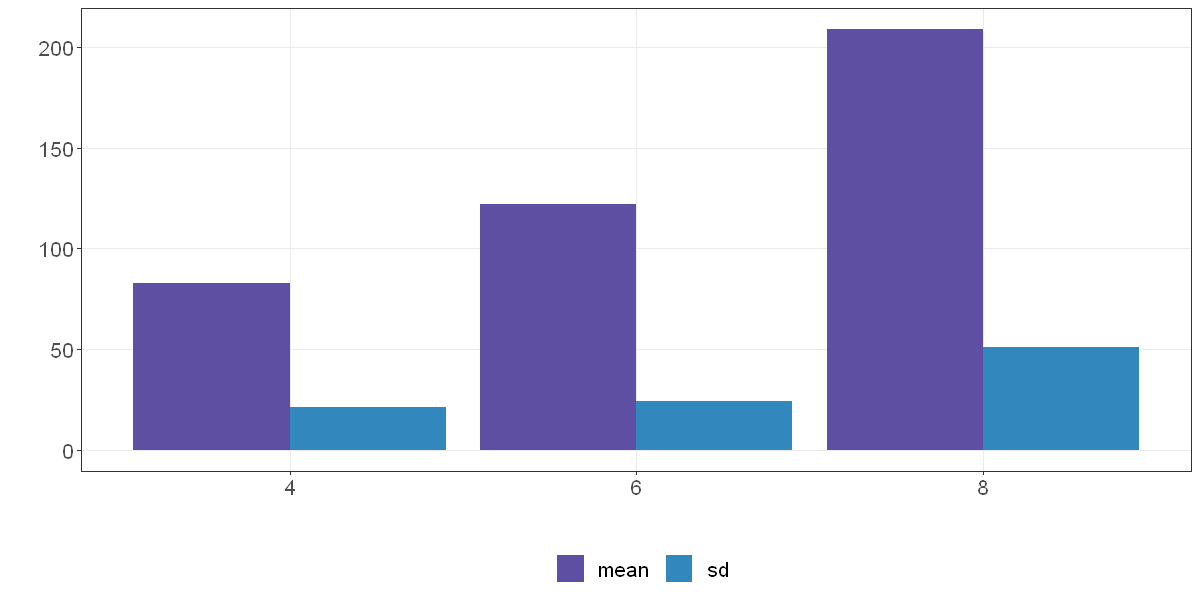

In [18]:
grf <- plot.groupedbar(example3, colors=colors[1:2]) + font
plot(grf)

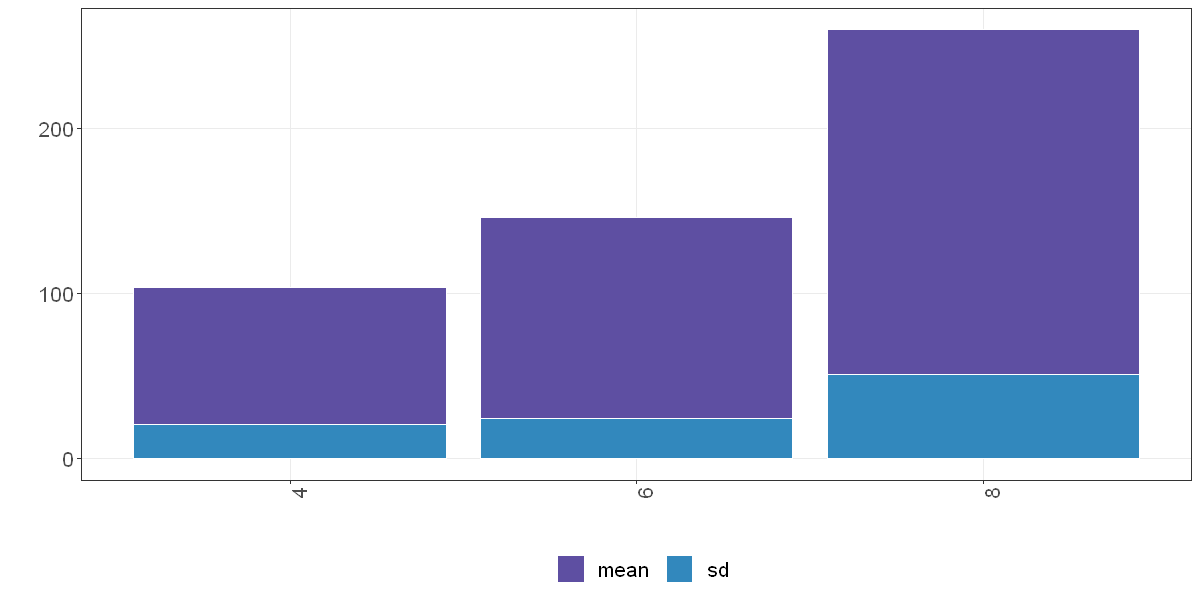

In [19]:
  grf <- plot.stackedbar(example3, colors=colors[1:2]) + font
  grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
  plot(grf)

## Dot plot

The dot plot has the same goal as a grouped bar graph.

It is also important to observe that the function $plot.dotchar$ internally uses $ggdotchart$, which is not compatible with other $ggplot$ methods. Customizations should be done using the $ggpar$ function, such as introducing a legend title. 

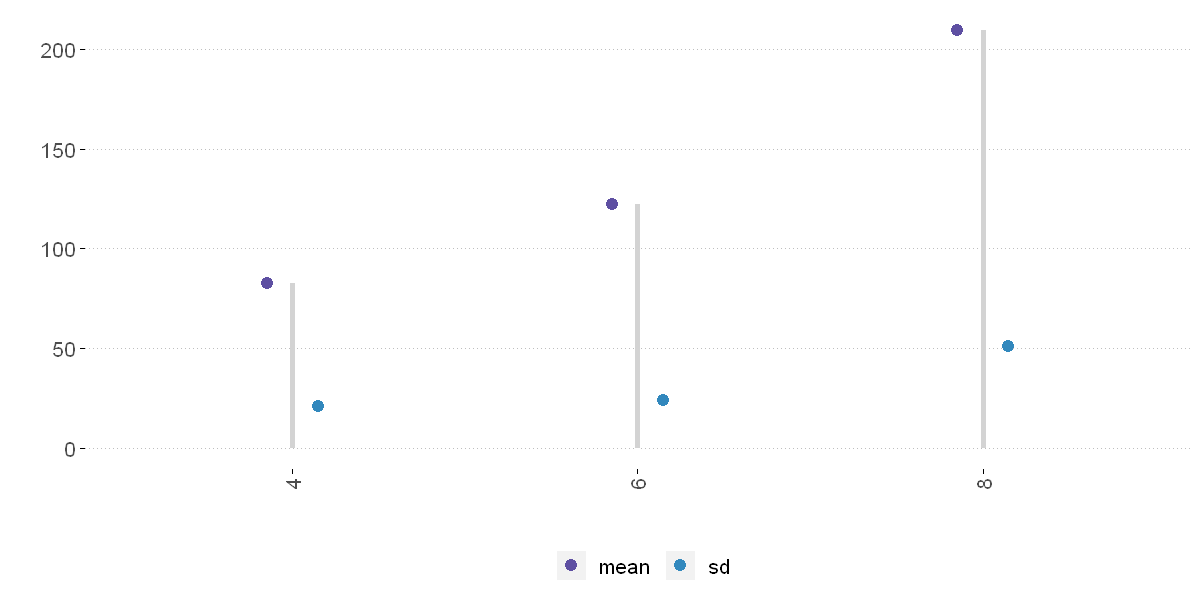

In [20]:
  grf <- plot.dotchar(example3, colors=colors[1:2]) + font
  grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
  plot(grf)

## Correlation plot

The correlation plots are used to display the pairwise correlation among all numerical attributes of a dataset.

In [21]:
# Correlation matrix
cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


corrplot 0.88 loaded



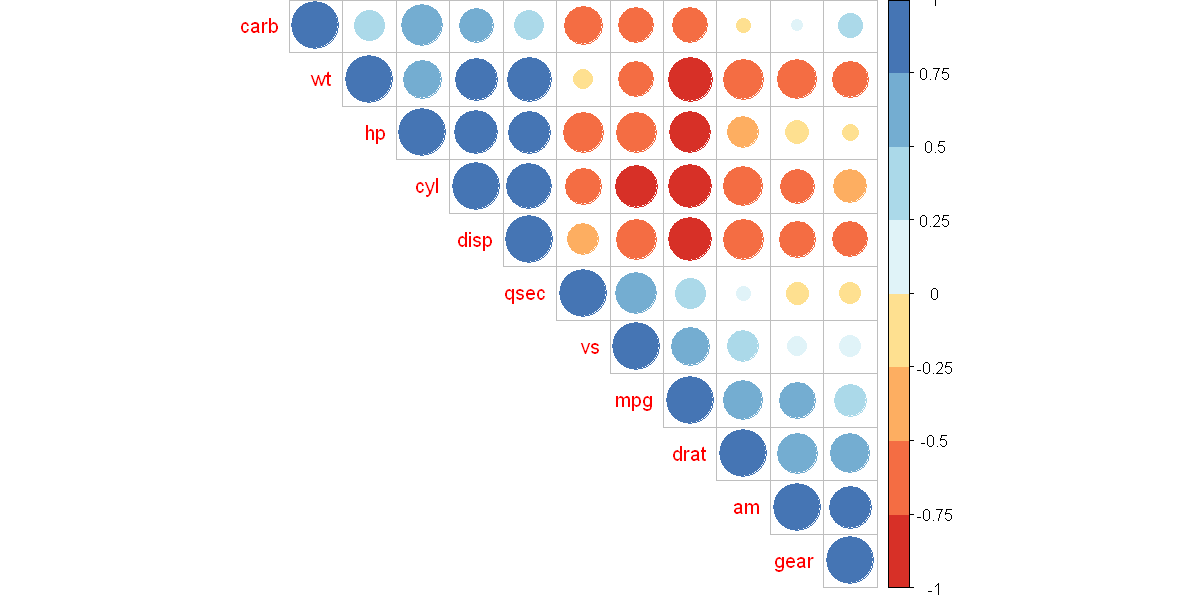

In [22]:
  plot.correlation(mtcars)

## Examples using data distribution
The following examples use random variables so that different data distribution can be better viewed.

In [23]:
# example4: dataset to be plotted  
example4 <- data.frame(exponential = rexp(100000, rate = 1), 
                     uniform = runif(100000, min = 2.5, max = 3.5), 
                     normal = rnorm(100000, mean=5), 
                     poisson = rpois(100000, lambda = 2))
head(example4)

,exponential,uniform,normal,poisson
,<dbl>,<dbl>,<dbl>,<int>
1,1.1200548,3.483557,5.845189,4
2,0.7022119,3.035749,5.319563,3
3,0.4311321,3.421295,4.095310,3
4,2.7303893,3.007487,5.695093,3
5,1.1368314,2.989779,6.548381,2
6,0.8133682,3.092287,5.434221,3


## Histogram

Visualize the distribution of a single continuous variable by dividing the x axis into bins and counting the number of observations in each bin. Histograms (geom_histogram()) display the counts with bars.
More information: ?geom_histogram (R documentation)

Using  as id variables



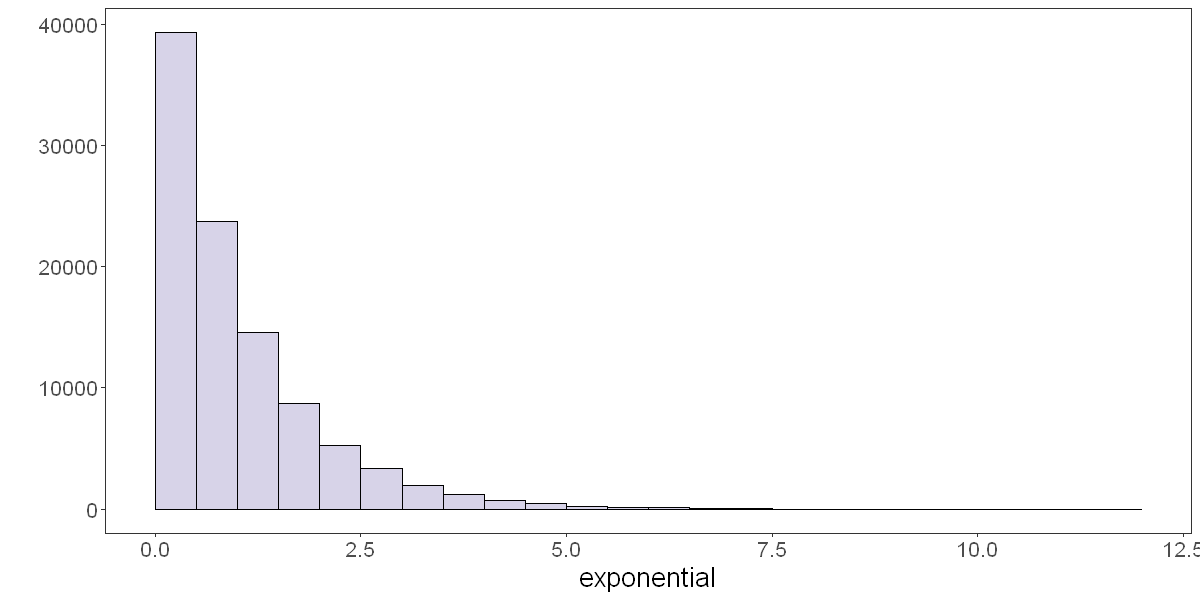

In [24]:
grf <- plot.hist(example4 %>% select(exponential), 
                  label_x = "exponential", color=colors[1]) + font
plot(grf)

## Arrangement of graphs

Function $grid.arrange$ is used to position previously computed charts

In [25]:
grfe <- plot.hist(example4 %>% select(exponential), 
                  label_x = "exponential", color=colors[1]) + font
grfu <- plot.hist(example4 %>% select(uniform), 
                  label_x = "uniform", color=colors[1]) + font  
grfn <- plot.hist(example4 %>% select(normal), 
                  label_x = "normal", color=colors[1]) + font 
grfp <- plot.hist(example4 %>% select(poisson), 
                  label_x = "poisson", color=colors[1]) + font

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables



Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




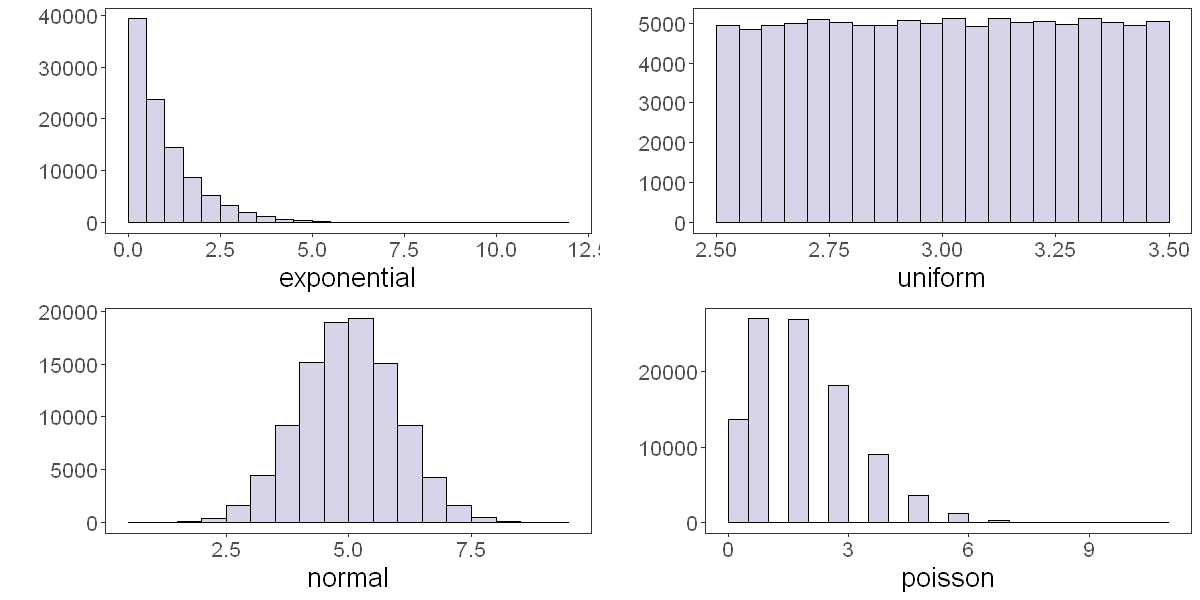

In [26]:
loadlibrary("gridExtra") 
grid.arrange(grfe, grfu, grfn, grfp, ncol=2)

## Density plot

Computes and draws kernel density estimate, which is a smoothed version of the histogram. This is a useful alternative to the histogram for continuous data that comes from an underlying smooth distribution.

More information: ?geom_density (R documentation)

In [27]:
grfe <- plot.density(example4 %>% select(exponential), 
                     label_x = "exponential", color=colors[1]) + font  
grfu <- plot.density(example4 %>% select(uniform), 
                     label_x = "uniform", color=colors[2]) + font  
grfn <- plot.density(example4 %>% select(normal), 
                     label_x = "normal", color=colors[3]) + font  

Using  as id variables

Using  as id variables

Using  as id variables



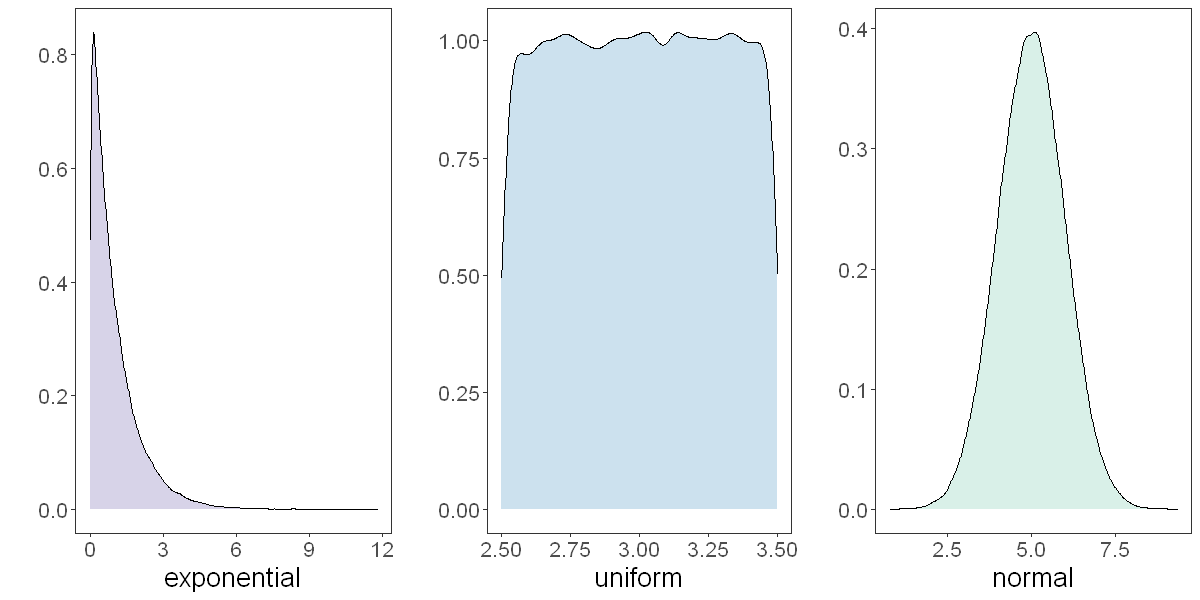

In [28]:
loadlibrary("gridExtra") 
grid.arrange(grfe, grfu, grfn, ncol=3)

Using  as id variables



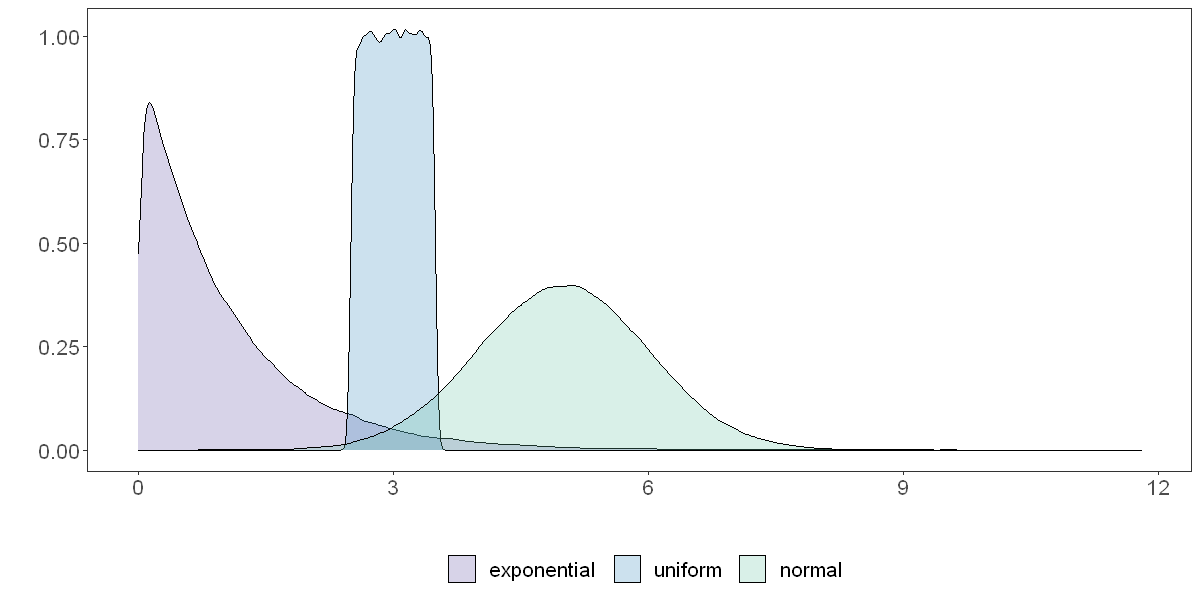

In [29]:
grf <- plot.density(example4 %>% select(exponential, uniform, normal), 
                    colors=colors[1:3]) + font
plot(grf)

## Box-plot
In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers), indicating variability outside the upper and lower quartiles (outliers). 

More information: https://en.wikipedia.org/wiki/Box_plot

Using  as id variables



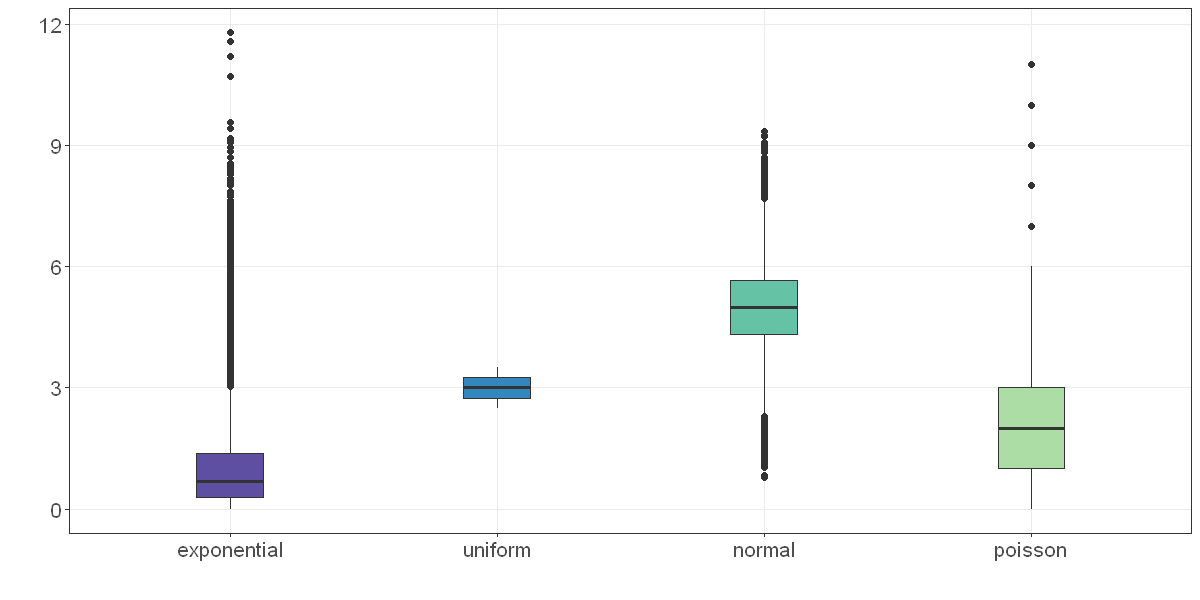

In [30]:
grf <- plot.boxplot(example4, colors=colors[1:4]) + font
plot(grf)  

## Comparing distribution with normal distribution

$stat\_qq()$ produce quantile-quantile plots comparing sample distributions with standard normal distribution.

More information: ?stat_qq (R documentation)

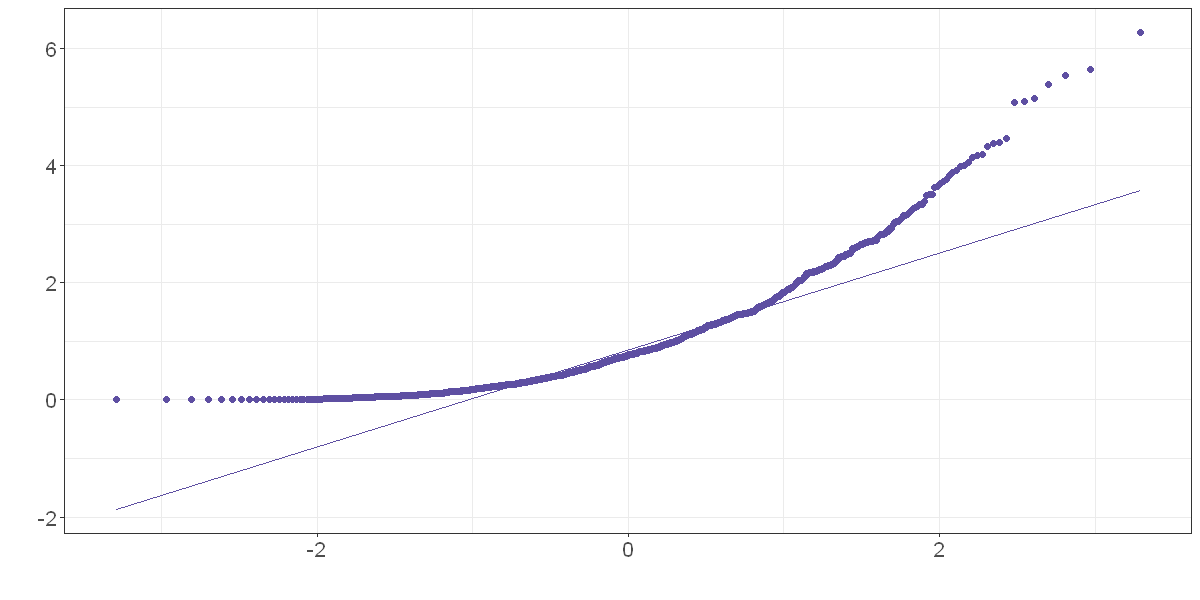

In [31]:
  grf <- plot.norm_dist(rexp(1000, rate=1), colors=colors[1]) + font
  plot(grf)

## Building PDF from graphics

In [32]:
pdf("examples/plot.pdf", width=4, height=3)
plot(grf)
dev.off()

png 
  2